In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import OrderedDict
from functools import partial
from time import time
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from numpy.linalg import svd
from sklearn.utils import resample
import seaborn as sns
from sklearn.datasets import fetch_openml
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
Axes3D
lle_points = 500

In [12]:
flower_data = cv2.imread('/content/sample_data/flower-729512__340.webp')

# Principal Component Analysis

# Image Data

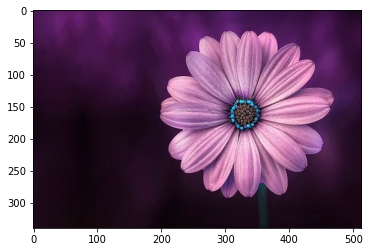

In [13]:
plt.imshow(flower_data)

In [14]:
bl,gr,rd = cv2.split(flower_data) 

In [15]:
#initialize PCA with first 5 principal components
pca_data_5 = PCA(5)
 
#Applying to red, green and blue channels and then applying inverse transform to transformed array.
rd_chan = pca_data_5.fit_transform(rd)
rd_invrt_chan = pca_data_5.inverse_transform(rd_chan)
gr_chan = pca_data_5.fit_transform(gr)
gr_invrt_chan = pca_data_5.inverse_transform(gr_chan)
bl_chan = pca_data_5.fit_transform(bl)
bl_invrt_chan = pca_data_5.inverse_transform(bl_chan)

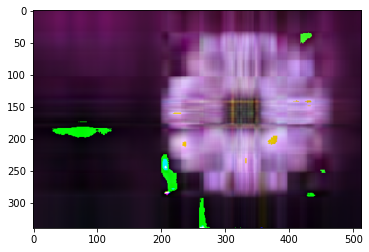

In [16]:
flower_compressed = (np.dstack((rd_invrt_chan, gr_invrt_chan, bl_invrt_chan))).astype(np.uint8)
#viewing the compressed image
plt.imshow(flower_compressed)

In [19]:
#initialize PCA with first 100 principal components
pca_data_100 = PCA(100)
 
rd_chan_100 = pca_data_100.fit_transform(rd)
rd_invrt_chan_100 = pca_data_100.inverse_transform(rd_chan_100)
gr_chan_100 = pca_data_100.fit_transform(gr)
gr_invrt_chan_100 = pca_data_100.inverse_transform(gr_chan_100)
bl_chan_100 = pca_data_100.fit_transform(bl)
bl_invrt_chan_100 = pca_data_100.inverse_transform(bl_chan_100)

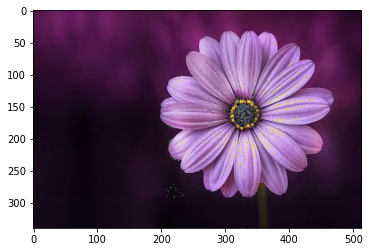

In [20]:
flower_compressed_100 = (np.dstack((rd_invrt_chan_100, gr_invrt_chan_100, bl_invrt_chan_100))).astype(np.uint8)

plt.imshow(flower_compressed_100)

Tabular Data

In [21]:
pca_car_data_set = px.data.carshare()
new_pca_data = pca_car_data_set[['centroid_lat', 'centroid_lon', 'peak_hour']]

# Implementation of PCA dimensionality Reduction Technique
pca_tabular_data = PCA(n_components=3)
pca_components = pca_tabular_data.fit_transform(new_pca_data)

# Displaying in the 3D-scatter plot after applying dimensionality reduction
pca_result_3d = px.scatter_3d(
    pca_components, x=0, y=1, z=2, color=pca_car_data_set['car_hours'],
    title=f'PCA-Dimensionality Reduction Technique',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
pca_result_3d.show()

Singular value decomposition

Image Data

In [22]:
svd_flower_data = cv2.imread('/content/sample_data/flower-729512__340.webp', 0) 
# obtain svd
U, S, V = np.linalg.svd(svd_flower_data)

# inspect shapes of the matrices
print(U.shape, S.shape, V.shape)

# plot images with different number of components
svd_components = [340, 250, 100, 50, 10, 5]

(340, 340) (340,) (513, 513)


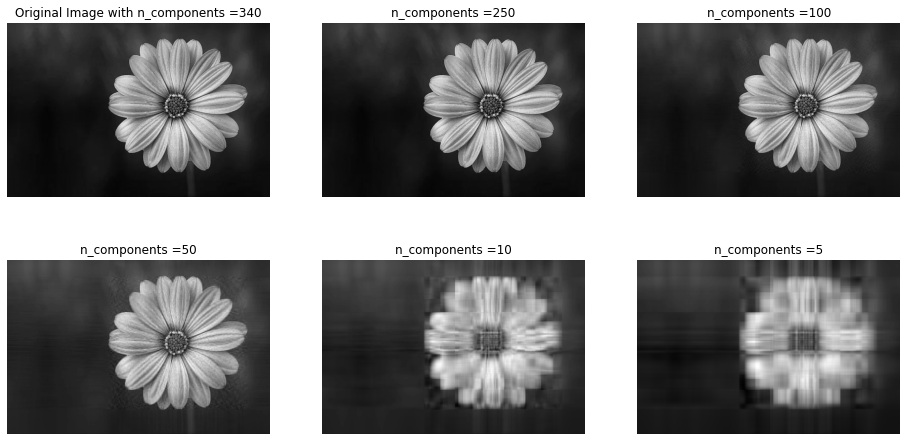

In [23]:
plt.figure(figsize = (16, 8))
for i in range(6):
 low_rank = U[:, :svd_components[i]] @ np.diag(S[:svd_components[i]]) @ V[:svd_components[i], :]
 if(i  == 0):
    plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(svd_components[i]))
 else:
    plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(svd_components[i]))


Tabular Data

In [24]:
# define your matrix as a numpy array
svd_array = np.array([[12,10,8], [13,16,19], [21,14,7]])
U, S, VT = svd(svd_array)
print(U @ np.diag(S) @ VT)

# Displaying in the 3D-scatter plot after applying dimensionality reduction
svd_result_3d = px.scatter_3d(
    svd_array, x=0, y=1, z=2, 
    title=f'SVD-Dimensionality Reduction Technique',
    labels={'0': 'U', '1': 'S', '2': 'VT'}
)
svd_result_3d.show()

[[12. 10.  8.]
 [13. 16. 19.]
 [21. 14.  7.]]


Locally Linear Embedding

Image Data

LLE: 0.14 sec


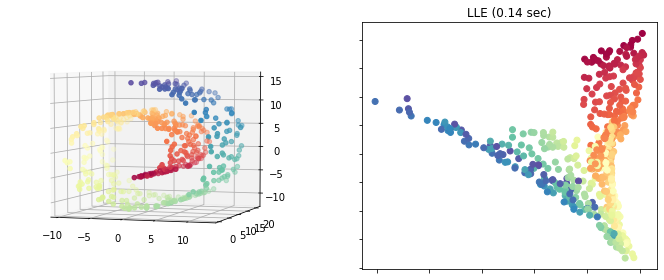

In [26]:
#We load the swiss roll dataset
data_X, color = datasets.make_swiss_roll(lle_points, random_state=0)
lle_neighbors = 10
lle_components = 2

lle_plot = plt.figure(figsize=(18, 10))
# Adding 3d scatter plot
lle_3d = lle_plot.add_subplot(231, projection='3d')
lle_3d.scatter(data_X[:, 0], data_X[:, 1], data_X[:, 2], c=color, cmap=plt.cm.Spectral)
lle_3d.view_init(4, -72)
# Making a dictionary 'methods' containing LLE
LLE = partial(manifold.LocallyLinearEmbedding, lle_neighbors, lle_components, eigen_solver='auto')
methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    transformed_X = method.fit_transform(data_X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    lle_3d = lle_plot.add_subplot(2, 3, 2 + i+(i>1))
    lle_3d.scatter(transformed_X[:, 0], transformed_X[:, 1], c=color, cmap=plt.cm.Spectral)
    lle_3d.set_title("%s (%.2g sec)" % (label, t1 - t0))
    lle_3d.xaxis.set_major_formatter(NullFormatter())
    lle_3d.yaxis.set_major_formatter(NullFormatter())
    lle_3d.axis('tight')
plt.show()

# Tabular Data

In [27]:
# Importing the data
lle_data, _ = load_digits(return_X_y=True)
lle_data.shape

# Reducing the dimensionality to 4 components
embedding = LocallyLinearEmbedding(n_components=4)
lle_transformed_data = embedding.fit_transform(lle_data[:100])
lle_transformed_data.shape

(100, 4)

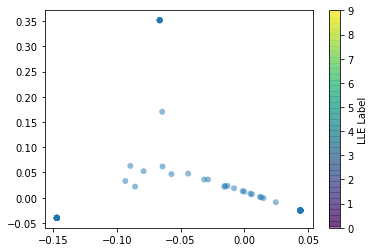

In [28]:
# Displaying the scatter plot after applying the dimensionality reduction
plt.scatter(lle_transformed_data[:, 0], lle_transformed_data[:, 1],
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Dark2', 10))
plt.colorbar(label='LLE Label', ticks=range(10))
plt.clim(0, 9);

# Implementing TSNE

In [ ]:
pca1 = PCA(n_components=50)
pca1 = pca1.fit_transform(x[:1000])
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca1)

In [ ]:
plot_2d(tsne[:, 0],tsne[:, 1])


# ISOMAP

In [ ]:
from sklearn.manifold import Isomap

isomap1 = Isomap(n_components=3) 
isomap_transform = isomap1.fit_transform(x[:1000])

In [ ]:
plot_2d(isomap1.embedding_[:, 0],isomap1.embedding_[:, 1])


UMAP

In [ ]:
umap1 = umap.UMAP(random_state=42,n_components=3)
umap_transform = umap1.fit_transform(x[:1000])


In [ ]:
plot_2d(umap1.embedding_[:, 0],umap1.embedding_[:, 1])